# Loading Data and quick check

In [33]:
import pandas as pd
import requests
import zipfile
from io import BytesIO

from sklearn.model_selection import train_test_split

In [42]:
# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

# Send a GET request to the URL
response = requests.get(url)

# Make sure the request was successful
response.raise_for_status()

# Open the zip file contained in the response
with zipfile.ZipFile(BytesIO(response.content)) as z:
    # Extract the contents to the current directory
    z.extractall()

# Read the CSV file
df = pd.read_csv('bank-full.csv', sep=';')  

In [43]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [44]:
print(df.shape)
print()

print(df['y'].value_counts())
print()

rate = df['y'].value_counts()['yes']/len(df)
print(f'Success rate: {rate:.4f}')

(45211, 17)

y
no     39922
yes     5289
Name: count, dtype: int64

Success rate: 0.1170


In [45]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# Data processing and data splitting

In [46]:
# One-hot encoding category value by get_dymmies function 

def enc(df, column):
    df_dummy = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df.drop([column], axis=1), df_dummy], axis=1)
    return df


df2 = df.copy()
df2 = enc(df2, 'job')
df2 = enc(df2, 'marital')
df2 = enc(df2, 'education')
df2 = enc(df2, 'contact')
df2 = enc(df2, 'poutcome')

df2.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,False,True,False,False,False,True,False,False,False,True
1,44,no,29,yes,no,5,may,151,1,-1,...,True,False,False,False,False,True,False,False,False,True
2,33,no,2,yes,yes,5,may,76,1,-1,...,True,False,False,False,False,True,False,False,False,True
3,47,no,1506,yes,no,5,may,92,1,-1,...,False,False,True,False,False,True,False,False,False,True
4,33,no,1,no,no,5,may,198,1,-1,...,False,False,True,False,False,True,False,False,False,True


In [47]:
def enc_bin(df, column):
    df[column] = df[column].map(dict(yes=1, no=0))
    return df

df2 = enc_bin(df2, 'default')
df2 = enc_bin(df2, 'housing')
df2 = enc_bin(df2, 'loan')
df2 = enc_bin(df2, 'y')

df2.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,...,False,True,False,False,False,True,False,False,False,True
1,44,0,29,1,0,5,may,151,1,-1,...,True,False,False,False,False,True,False,False,False,True
2,33,0,2,1,1,5,may,76,1,-1,...,True,False,False,False,False,True,False,False,False,True
3,47,0,1506,1,0,5,may,92,1,-1,...,False,False,True,False,False,True,False,False,False,True
4,33,0,1,0,0,5,may,198,1,-1,...,False,False,True,False,False,True,False,False,False,True


In [48]:
month_dict = dict(jan=1, feb=2, mar=3, apr=4, may=5, jun=6, jul=7, aug=8, sep=9, oct=10, nov=11, dec=12)

def enc_month(df, column):
    df[column] = df[column].map(month_dict)
    return df


df2 = enc_month(df2, 'month')

df2.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,False,True,False,False,False,True,False,False,False,True
1,44,0,29,1,0,5,5,151,1,-1,...,True,False,False,False,False,True,False,False,False,True
2,33,0,2,1,1,5,5,76,1,-1,...,True,False,False,False,False,True,False,False,False,True
3,47,0,1506,1,0,5,5,92,1,-1,...,False,False,True,False,False,True,False,False,False,True
4,33,0,1,0,0,5,5,198,1,-1,...,False,False,True,False,False,True,False,False,False,True


In [49]:
x = df2.drop('y', axis=1)
y = df2['y'].values

test_size = 0.4
random_seed = 42

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_seed, stratify=y)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

27126
18085
27126
18085


# Choosing algorithm

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold

In [57]:
algo_linear = LogisticRegression(random_state=random_seed)
algo_tree = DecisionTreeClassifier(random_state=random_seed)
algo_random_forest = RandomForestClassifier(random_state=random_seed)
algo_xgb = XGBClassifier(random_state=random_seed)

algorithms = [algo_linear, algo_tree, algo_random_forest, algo_xgb]

In [63]:
from sklearn.model_selection import cross_val_score

import warnings
from sklearn.exceptions import ConvergenceWarning

# We can ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

stratifiedkfold = StratifiedKFold(n_splits=3)

for algorithm in algorithms:
    scores = cross_val_score(algorithm, x_train, y_train, cv=stratifiedkfold, scoring='roc_auc')
    score = scores.mean()
    name = algorithm.__class__.__name__
    print(f'average score: {score:.4f}, scores: {scores} {name}')

average score: 0.8246, scores: [0.80759158 0.83030214 0.83587982] LogisticRegression
average score: 0.7009, scores: [0.69398144 0.70552968 0.70328618] DecisionTreeClassifier
average score: 0.9218, scores: [0.92183683 0.92222749 0.92137228] RandomForestClassifier
average score: 0.9266, scores: [0.92646181 0.92731683 0.92607728] XGBClassifier


In [66]:
algorithm = XGBClassifier(random_state=random_seed)

# Learn
algorithm.fit(x_train, y_train)

# Predict
y_pred = algorithm.predict(x_test)

# Evaluate the model

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# y_test: 実際のラベル, y_pred: 予測したラベル
cm = confusion_matrix(y_test, y_pred)


# 混同行列をDataFrameとして表示するための関数を定義する
def make_cm(matrix, columns):
    # columns: 混同行列のラベル（クラス名）
    n = len(columns)  # クラスの数
    act = ['Actual Val: {}'.format(col) for col in columns]
    pred = ['Predicted Val: {}'.format(col) for col in columns]

    df = pd.DataFrame(
        data=matrix, 
        index=act, 
        columns=pred)
    return df

# 混同行列のラベルを設定
labels = ['fail', 'success']
df_matrix = make_cm(cm, labels)
display(df_matrix)  


precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Fscore: {fscore:.4f}")

,Predicted Val: fail,Predicted Val: success
Actual Val: fail,15407,562
Actual Val: success,1134,982


Precision: 0.6360
Recall: 0.4641
Fscore: 0.5366


# Tuning

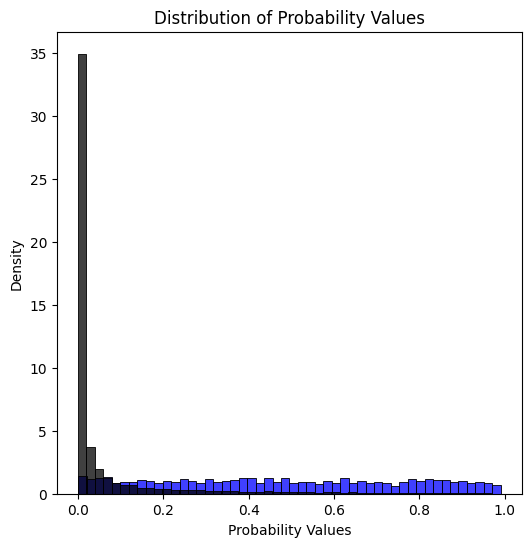

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

y_proba0 = algorithm.predict_proba(x_test)[:,1]

y0 = y_proba0[y_test==0]
y1 = y_proba0[y_test==1]

plt.figure(figsize=(6,6))
plt.title('Distribution of Probability Values')
sns.histplot(y1, kde=False, stat="density", bins=50, color='b', label='success')
sns.histplot(y0, kde=False, stat="density", bins=50, color='k', label='fail')
plt.xlabel('Probability Values')
plt.show()

In [90]:
import numpy as np

def pred(algorithm, x, threshold):
    y_proba = algorithm.predict_proba(x)
    y_proba1 = y_proba[:, 1]  
    y_pred = (y_proba1 > threshold).astype(int)

    return y_pred

threshold_list = np.arange(0.5, 0, -0.05)

for thres in threshold_list:
    y_pred = pred(algorithm, x_test, thres)
    pred_sum = y_pred.sum()
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print(f'閾値: {thres:.2f}, 陽性予測数: {pred_sum}, 適合率: {precision:.4f}, 再現率: {recall:.4f}, F値: {fscore:.4f}')

閾値: 0.50, 陽性予測数: 1544, 適合率: 0.6360, 再現率: 0.4641, F値: 0.5366
閾値: 0.45, 陽性予測数: 1769, 適合率: 0.6218, 再現率: 0.5198, F値: 0.5663
閾値: 0.40, 陽性予測数: 2018, 適合率: 0.6001, 再現率: 0.5723, F値: 0.5859
閾値: 0.35, 陽性予測数: 2290, 適合率: 0.5838, 再現率: 0.6319, F値: 0.6069
閾値: 0.30, 陽性予測数: 2568, 適合率: 0.5619, 再現率: 0.6819, F値: 0.6161
閾値: 0.25, 陽性予測数: 2883, 適合率: 0.5369, 再現率: 0.7316, F値: 0.6193
閾値: 0.20, 陽性予測数: 3274, 適合率: 0.5070, 再現率: 0.7845, F値: 0.6160
閾値: 0.15, 陽性予測数: 3719, 適合率: 0.4741, 再現率: 0.8332, F値: 0.6043
閾値: 0.10, 陽性予測数: 4325, 適合率: 0.4303, 再現率: 0.8795, F値: 0.5779
閾値: 0.05, 陽性予測数: 5370, 適合率: 0.3672, 再現率: 0.9319, F値: 0.5269


In [92]:
y_final = pred(algorithm, x_test, 0.30)

cm = confusion_matrix(y_test, y_final)
df_matrix = make_cm(cm, labels)
display(df_matrix)  


precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_final, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Fscore: {fscore:.4f}")

,Predicted Val: fail,Predicted Val: success
Actual Val: fail,14844,1125
Actual Val: success,673,1443


Precision: 0.5619
Recall: 0.6819
Fscore: 0.6161


# Feature Importance Analysis

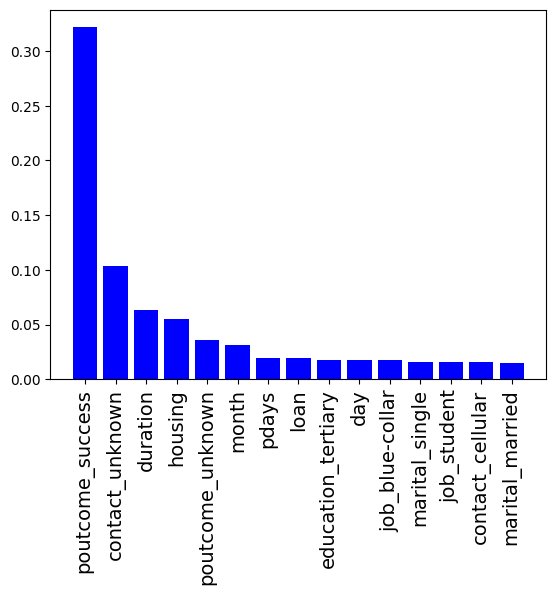

In [108]:
importances = algorithm.feature_importances_

w = pd.Series(importances, index=x.columns)

u = w.sort_values(ascending=False)

v = u[:15]

plt.title('', fontsize=14)
plt.bar(range(len(v)), v, color='b', align='center')
plt.xticks(range(len(v)), v.index, rotation=90, fontsize=14)
plt.show()

In [101]:
def impact_analysis(x_test, y_test, column, bins):
    sns.histplot(x_test[y_test==1][column], kde=False, stat="density", bins=bins, color='b', label='success')
    sns.histplot(x_test[y_test==0][column], kde=False, stat="density", bins=bins, color='k', label='fail')
    
    plt.legend()
    plt.show()

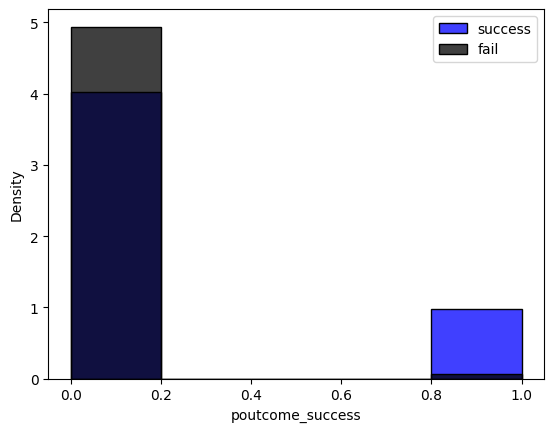

In [97]:
column = 'poutcome_success'
bins = 5
impact_analysis(x_test, y_test, column, bins)

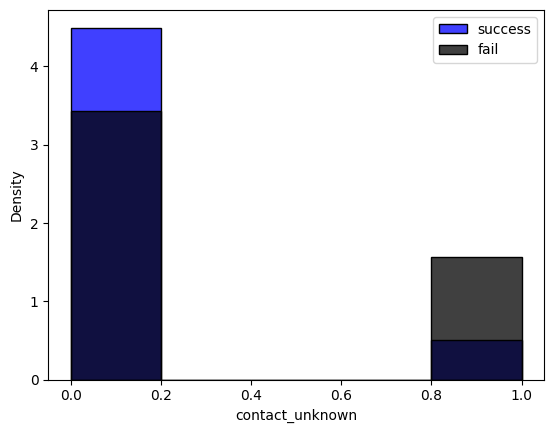

In [98]:
column = 'contact_unknown'
bins = 5
impact_analysis(x_test, y_test, column, bins)

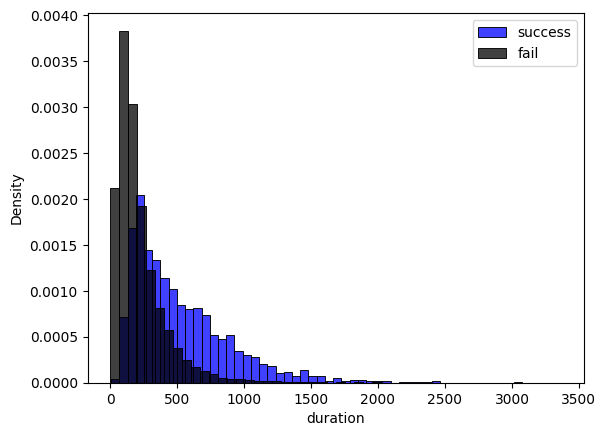

In [102]:
column = 'duration'
bins = 50
impact_analysis(x_test, y_test, column, bins)

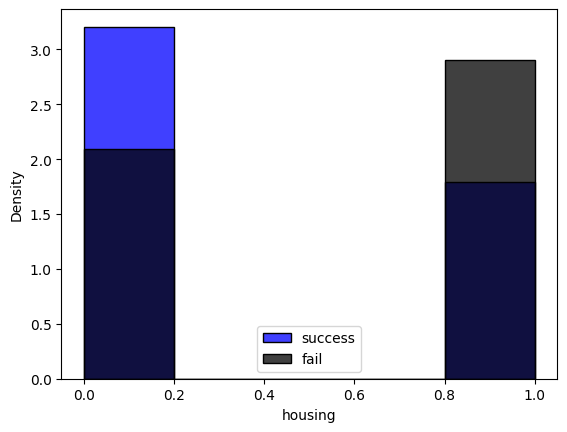

In [103]:
column = 'housing'
bins = 5
impact_analysis(x_test, y_test, column, bins)

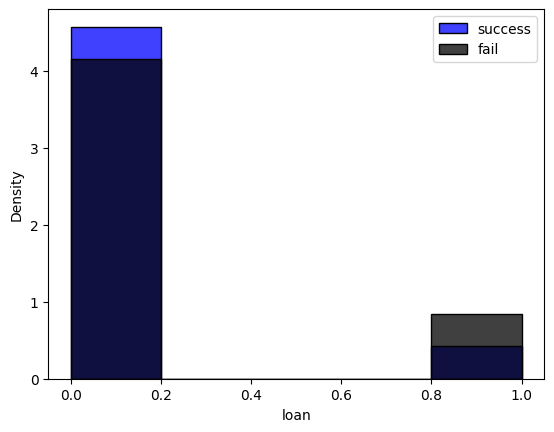

In [104]:
column = 'loan'
bins = 5
impact_analysis(x_test, y_test, column, bins)

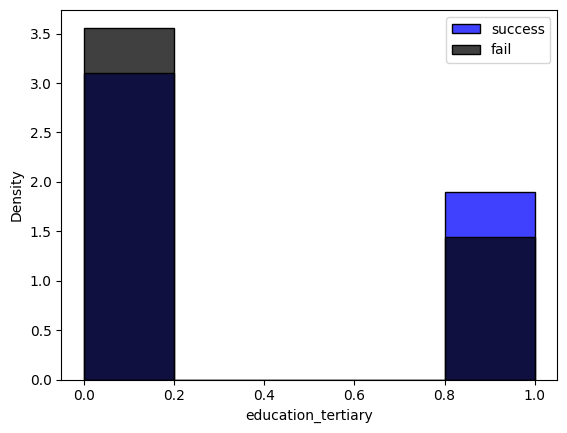

In [105]:
column = 'education_tertiary'
bins = 5
impact_analysis(x_test, y_test, column, bins)

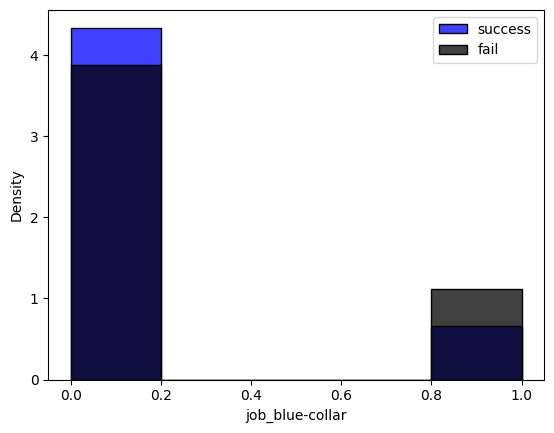

In [111]:
column = 'job_blue-collar'
bins = 5
impact_analysis(x_test, y_test, column, bins)